In [ ]:
#Import Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import sys
import time
import json
import ipaddress
import socket, struct
import seaborn as sns
from numpy import array
from random import random
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
netflow = pd.read_csv('/content/nfcapd202110062249.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt'])

In [ ]:
netflow.head(20)

,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt
0,0.000,44.149.43.199,44.149.43.193,34241,53.0,UDP,1.0,64.0,0.0,0.0
1,0.000,44.148.20.57,44.149.43.1,35660,53.0,UDP,1.0,64.0,0.0,0.0
2,0.000,44.149.43.1,44.148.20.57,53,35660.0,UDP,1.0,80.0,0.0,0.0
3,0.000,44.149.43.193,44.149.43.199,53,34241.0,UDP,1.0,216.0,0.0,0.0
4,0.000,44.149.43.199,168.235.104.115,44182,80.0,TCP,1.0,60.0,0.0,0.0
5,0.000,168.235.104.115,44.149.43.199,80,44182.0,TCP,1.0,88.0,0.0,0.0
6,5.370,50.235.87.130,44.149.43.210,80,55522.0,TCP,6.0,581.0,0.0,0.0
7,5.480,44.149.43.210,50.235.87.130,55522,80.0,TCP,7.0,658.0,0.0,0.0
8,0.000,44.149.16.139,44.225.41.134,56506,8080.0,TCP,1.0,60.0,0.0,0.0
9,0.000,44.149.16.139,44.225.41.134,41014,81.0,TCP,1.0,60.0,0.0,0.0


In [ ]:
netflow.drop(netflow.tail(3).index,inplace=True)

In [ ]:
netflow.tail(10)

,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt
2840,0.000,44.149.16.139,44.225.41.134,46682,81.0,TCP,1.0,60.0,0.0,0.0
2841,0.000,44.225.41.134,44.149.16.139,81,46682.0,TCP,1.0,40.0,0.0,0.0
2842,0.000,44.149.16.139,44.225.41.134,33946,8080.0,TCP,1.0,60.0,0.0,0.0
2843,0.000,44.225.41.134,44.149.16.139,8080,33946.0,TCP,1.0,40.0,0.0,0.0
2844,14.040,44.143.102.147,44.149.43.132,5060,5060.0,UDP,4.0,2450.0,0.0,0.0
2845,14.030,44.149.43.132,44.143.102.147,5060,5060.0,UDP,4.0,2328.0,0.0,0.0
2846,0.000,44.132.28.65,44.149.43.132,4520,4520.0,UDP,1.0,36.0,0.0,0.0
2847,0.000,44.149.43.132,44.132.28.65,4520,4520.0,UDP,1.0,36.0,0.0,0.0
2848,0.000,44.132.28.65,44.149.43.21,4520,4520.0,UDP,1.0,36.0,0.0,0.0
2849,0.000,44.149.43.21,44.132.28.65,4520,4520.0,UDP,1.0,36.0,0.0,0.0


In [ ]:
netflow = netflow.dropna()

In [ ]:
netflow.shape


(2850, 10)

In [ ]:
netflow['sp'] = netflow.sp.astype(float)
netflow['td'] = netflow.sp.astype(float)

In [ ]:
#Import Port Numbers dataset
port_values = pd.read_csv('/content/Port numbers 1.csv')
Host_names = pd.read_csv('/content/Sorted_Host.csv')

In [ ]:
#Converting Port numbers and description into a dictionary
port2value = zip(port_values['Port'], port_values['Description'])
port_description = list(port2value)
Port_value = dict(port_description)
Port_value

{0: 'In programming APIs- requests a system-allocated (dynamic) port',
 1: 'TCP Port Service Multiplexer (TCPMUX)',
 2: 'CompressNET Management Utility(official)',
 3: 'CompressNET Compression Process(Official)',
 5: 'Remote Job Entry',
 7: 'Echo Protocol',
 9: 'Discard Protocol',
 10: 'Wake-on-LAN',
 11: 'Active Users (systat service)',
 13: 'Daytime Protocol',
 15: 'Previously netstat service',
 17: 'Quote of the Day (QOTD)',
 18: 'Message Send Protocol',
 19: 'Character Generator Protocol (CHARGEN)',
 20: 'File Transfer Protocol (FTP) data transfer',
 21: 'File Transfer Protocol (FTP) control (command)',
 22: 'Secure Shell (SSH)',
 23: 'Telnet protocol—unencrypted text communications',
 25: 'Simple Mail Transfer Protocol (SMTP)',
 28: "Palo Alto Networks' Panorama High Availability (HA)",
 37: 'Time Protocol',
 42: 'Host Name Server Protocol',
 43: 'WHOIS protocol',
 49: 'TACACS Login Host protocol',
 51: 'Historically used for Interface Message Processor ',
 52: 'Xerox Network Syst

In [ ]:
#Mapping Values
netflow['Src_value'] = netflow['sp'].map(Port_value)
netflow['Dst_value'] = netflow['dp'].map(Port_value)
netflow.Src_value = netflow.Src_value.fillna("Unassigned")
netflow.Dst_value = netflow.Dst_value.fillna("Unassigned")

In [ ]:
#Converting Host_Names and description into a dictionary
host2value = zip(Host_names['Ip'], Host_names['Name'])
Host_description = list(host2value)
host_value = dict(Host_description)
host_value

In [ ]:
netflow['Device_Src'] = netflow['sa'].map(host_value)
netflow['Device_Dst'] = netflow['da'].map(host_value)
netflow['Device_Src'] = netflow['Device_Src'].fillna("Unknown_Device")
netflow['Device_Dst'] = netflow['Device_Dst'].fillna("Unknown_Device")

In [ ]:
netflow.head(50)

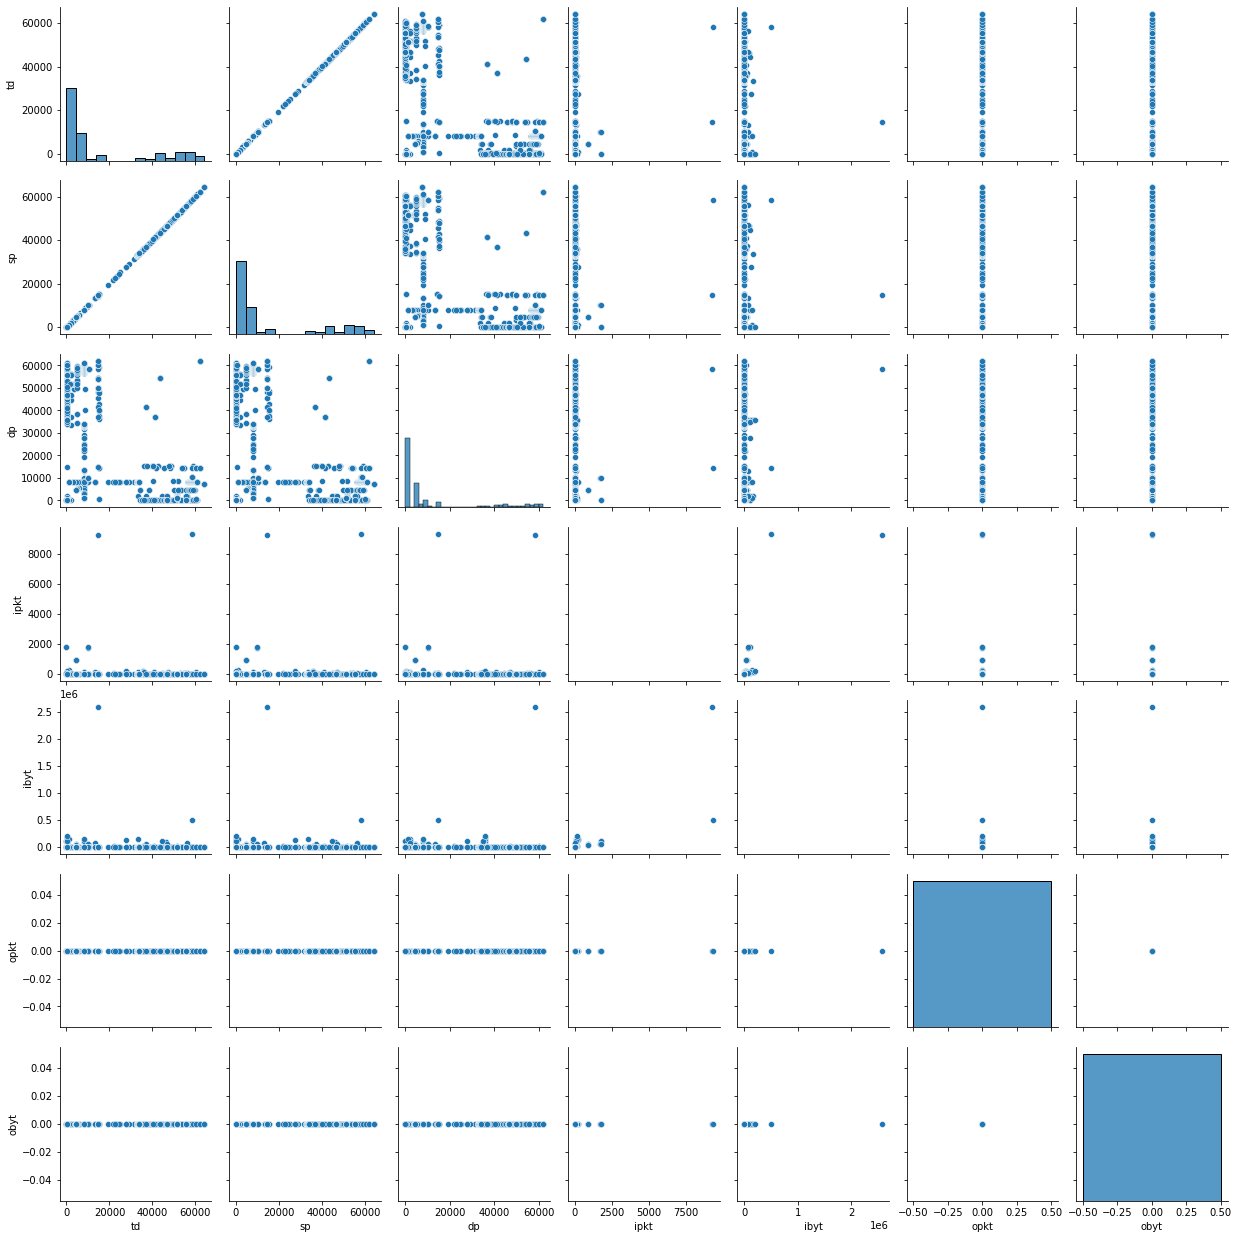

In [ ]:
sns.pairplot(netflow)

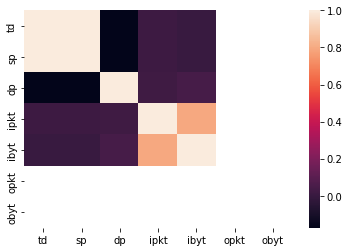

In [ ]:
sns.heatmap(netflow.corr())

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(netflow['Device_Src'])
plt.xticks(rotation=90)

In [ ]:
sns.boxplot(netflow['ipkt'],netflow['sa'])

In [ ]:
import plotly.graph_objects as go

def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()
plot_distribution(netflow['Device_Src'])

In [ ]:
plot_distribution(netflow['Device_Dst'])

In [ ]:
netflow.sa.nunique()


169

In [ ]:
netflow.sa.value_counts()

44.149.43.22     399
44.225.41.134    275
44.149.16.139    275
44.149.43.210    162
44.149.43.132    110
                ... 
44.143.230.2       1
44.155.254.4       1
176.9.166.35       1
44.149.102.80      1
44.149.43.3        1
Name: sa, Length: 169, dtype: int64

In [ ]:
netflow.Device_Src.nunique()

104

In [ ]:
netflow.Device_Src.value_counts()

In [ ]:
pip install pySankey

In [ ]:
import pandas as pd
from pySankey import sankey

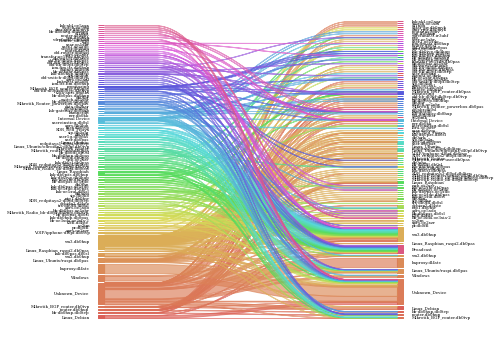

In [ ]:
sankey.sankey(left=netflow['Device_Src'], right=netflow['Device_Dst'], aspect=20,fontsize=4)

In [ ]:
#CIDR ranges
ClassA_range = ipaddress.ip_network('44.149.43.192/26')
for x in ClassA_range.hosts():
  print(x)

44.149.43.193
44.149.43.194
44.149.43.195
44.149.43.196
44.149.43.197
44.149.43.198
44.149.43.199
44.149.43.200
44.149.43.201
44.149.43.202
44.149.43.203
44.149.43.204
44.149.43.205
44.149.43.206
44.149.43.207
44.149.43.208
44.149.43.209
44.149.43.210
44.149.43.211
44.149.43.212
44.149.43.213
44.149.43.214
44.149.43.215
44.149.43.216
44.149.43.217
44.149.43.218
44.149.43.219
44.149.43.220
44.149.43.221
44.149.43.222
44.149.43.223
44.149.43.224
44.149.43.225
44.149.43.226
44.149.43.227
44.149.43.228
44.149.43.229
44.149.43.230
44.149.43.231
44.149.43.232
44.149.43.233
44.149.43.234
44.149.43.235
44.149.43.236
44.149.43.237
44.149.43.238
44.149.43.239
44.149.43.240
44.149.43.241
44.149.43.242
44.149.43.243
44.149.43.244
44.149.43.245
44.149.43.246
44.149.43.247
44.149.43.248
44.149.43.249
44.149.43.250
44.149.43.251
44.149.43.252
44.149.43.253
44.149.43.254


In [ ]:
ClassB_range = ipaddress.ip_network('44.149.43.128/26')
for x in ClassB_range.hosts():
  print(x)

44.149.43.129
44.149.43.130
44.149.43.131
44.149.43.132
44.149.43.133
44.149.43.134
44.149.43.135
44.149.43.136
44.149.43.137
44.149.43.138
44.149.43.139
44.149.43.140
44.149.43.141
44.149.43.142
44.149.43.143
44.149.43.144
44.149.43.145
44.149.43.146
44.149.43.147
44.149.43.148
44.149.43.149
44.149.43.150
44.149.43.151
44.149.43.152
44.149.43.153
44.149.43.154
44.149.43.155
44.149.43.156
44.149.43.157
44.149.43.158
44.149.43.159
44.149.43.160
44.149.43.161
44.149.43.162
44.149.43.163
44.149.43.164
44.149.43.165
44.149.43.166
44.149.43.167
44.149.43.168
44.149.43.169
44.149.43.170
44.149.43.171
44.149.43.172
44.149.43.173
44.149.43.174
44.149.43.175
44.149.43.176
44.149.43.177
44.149.43.178
44.149.43.179
44.149.43.180
44.149.43.181
44.149.43.182
44.149.43.183
44.149.43.184
44.149.43.185
44.149.43.186
44.149.43.187
44.149.43.188
44.149.43.189
44.149.43.190


In [ ]:
#Convert Ip addresses datatype from String to Integer
netflow['sa'] = netflow.sa.str.replace(".","")
netflow['da'] = netflow.da.str.replace(".","")
netflow['sa'] = netflow.sa.astype(int)
netflow['da'] = netflow.da.astype(int)

In [ ]:
netflow.dtypes

td            float64
sa              int64
da              int64
sp            float64
dp            float64
pr             object
ipkt          float64
ibyt          float64
opkt          float64
obyt          float64
Src_value      object
Dst_value      object
Device_Src     object
Device_Dst     object
dtype: object

In [ ]:
#Classifying into classes
#Class A - source OR destination (or both) in 44.149.43.192/26   (Site network of DB0TVP in HAMNETDB)
Class_A = netflow[((netflow['sa'] > 4414943192) & (netflow['sa'] < 4414943255)) | ((netflow['da'] > 4414943192) & (netflow['da'] < 4414943255)) ]
Class_A

,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Src_value,Dst_value,Device_Src,Device_Dst
0,34241.0,4414943199,4414943193,34241.0,53.0,UDP,1.0,64.0,0.0,0.0,Unassigned,Domain Name System (DNS),Linux_Debian,Mikrotik_BGP_router.db0tvp
3,53.0,4414943193,4414943199,53.0,34241.0,UDP,1.0,216.0,0.0,0.0,Domain Name System (DNS),Unassigned,Mikrotik_BGP_router.db0tvp,Linux_Debian
4,44182.0,4414943199,168235104115,44182.0,80.0,TCP,1.0,60.0,0.0,0.0,Unassigned,Hypertext Transfer Protocol (HTTP),Linux_Debian,Unknown_Device
5,80.0,168235104115,4414943199,80.0,44182.0,TCP,1.0,88.0,0.0,0.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Linux_Debian
6,80.0,5023587130,4414943210,80.0,55522.0,TCP,6.0,581.0,0.0,0.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,51359.0,4414943210,4414943223,51359.0,1024.0,UDP,1.0,91.0,0.0,0.0,Unassigned,Reserved,Windows,Unknown_Device
2829,5060.0,4414943132,4414943203,5060.0,5062.0,UDP,1.0,602.0,0.0,0.0,Session Initiation Protocol (SIP),Localisation access,Linux_Ubuntu/raspi.db0pas,VOIP/ipphone-dl0pf.db0tvp
2830,5062.0,4414943203,4414943132,5062.0,5060.0,UDP,2.0,401.0,0.0,0.0,Localisation access,Session Initiation Protocol (SIP),VOIP/ipphone-dl0pf.db0tvp,Linux_Ubuntu/raspi.db0pas
2838,5060.0,4414943132,4414943203,5060.0,5062.0,UDP,1.0,602.0,0.0,0.0,Session Initiation Protocol (SIP),Localisation access,Linux_Ubuntu/raspi.db0pas,VOIP/ipphone-dl0pf.db0tvp


In [ ]:
Class_A.shape

(859, 14)

In [ ]:
plot_distribution(Class_A['Device_Src'])

In [ ]:
plot_distribution(Class_A['Device_Dst'])

In [ ]:
plot_distribution(Class_A['Src_value'])

In [ ]:
plot_distribution(Class_A['Dst_value'])

In [ ]:
Class_A.Device_Src.unique()

In [ ]:
Class_A.sa.nunique()

41

In [ ]:
Class_A.Device_Src.value_counts()

In [ ]:
Class_A.Device_Dst.value_counts()

In [ ]:
sankey.sankey(left=Class_A['Device_Src'], right=Class_A['Device_Dst'], aspect=20,fontsize=8)

In [ ]:
#Class B - source OR destination (ot both) in 44.149.43.128/26   (Site network of DB0PAS in HAMNETDB)
Class_B = netflow[((netflow['sa'] > 4414943128) & (netflow['sa'] < 4414943192)) | ((netflow['da'] > 4414943128) & (netflow['da'] < 4414943192)) ]
Class_B

,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Src_value,Dst_value,Device_Src,Device_Dst
10,4520.0,441322865,4414943132,4520.0,4520.0,UDP,1.0,36.0,0.0,0.0,Microsoft Silverlight Connectable ports under ...,Microsoft Silverlight Connectable ports under ...,Unknown_Device,Linux_Ubuntu/raspi.db0pas
11,4520.0,4414943132,441322865,4520.0,4520.0,UDP,1.0,36.0,0.0,0.0,Microsoft Silverlight Connectable ports under ...,Microsoft Silverlight Connectable ports under ...,Linux_Ubuntu/raspi.db0pas,Unknown_Device
18,4520.0,1372267998,4414943132,4520.0,4520.0,UDP,891.0,32076.0,0.0,0.0,Microsoft Silverlight Connectable ports under ...,Microsoft Silverlight Connectable ports under ...,Unknown_Device,Linux_Ubuntu/raspi.db0pas
19,4520.0,4414943132,1372267998,4520.0,4520.0,UDP,891.0,32076.0,0.0,0.0,Microsoft Silverlight Connectable ports under ...,Microsoft Silverlight Connectable ports under ...,Linux_Ubuntu/raspi.db0pas,Unknown_Device
20,14580.0,464193202,4414943134,14580.0,54578.0,TCP,26.0,3078.0,0.0,0.0,Unassigned,Unassigned,Unknown_Device,Linux_Raspbian_raspi2.db0pas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,5062.0,4414943203,4414943132,5062.0,5060.0,UDP,2.0,401.0,0.0,0.0,Localisation access,Session Initiation Protocol (SIP),VOIP/ipphone-dl0pf.db0tvp,Linux_Ubuntu/raspi.db0pas
2844,5060.0,44143102147,4414943132,5060.0,5060.0,UDP,4.0,2450.0,0.0,0.0,Session Initiation Protocol (SIP),Session Initiation Protocol (SIP),Unknown_Device,Linux_Ubuntu/raspi.db0pas
2845,5060.0,4414943132,44143102147,5060.0,5060.0,UDP,4.0,2328.0,0.0,0.0,Session Initiation Protocol (SIP),Session Initiation Protocol (SIP),Linux_Ubuntu/raspi.db0pas,Unknown_Device
2846,4520.0,441322865,4414943132,4520.0,4520.0,UDP,1.0,36.0,0.0,0.0,Microsoft Silverlight Connectable ports under ...,Microsoft Silverlight Connectable ports under ...,Unknown_Device,Linux_Ubuntu/raspi.db0pas


In [ ]:
Class_B.shape

(443, 14)

In [ ]:
plot_distribution(Class_B['Device_Src'])

In [ ]:
plot_distribution(Class_B['Device_Dst'])

In [ ]:
sankey.sankey(left=Class_B['Device_Src'], right=Class_B['Device_Dst'], aspect=20,fontsize=8)

In [ ]:
#Class C - Anything Else
Class_C = netflow[(~((netflow['sa'] > 4414943128) & (netflow['sa'] < 4414943255))) & (~((netflow['da'] > 4414943128) & (netflow['da'] < 4414943255))) ]
Class_C

In [ ]:
Class_C.shape

(1580, 14)

In [ ]:
sankey.sankey(left=Class_C['Device_Src'], right=Class_C['Device_Dst'], aspect=20,fontsize=8)

In [ ]:
plot_distribution(Class_C['Device_Src'])

In [ ]:
#Union of Class A and Class B
Class_A1 = pd.concat([Class_A,Class_B], ignore_index=True)
Class_A1.shape

(1302, 14)

In [ ]:
#Sorting Source IP with reference to Destination IP
Src_Ip_Sorted = Class_A1.sort_values(by=['sa','da'])
Src_Ip_Sorted.to_csv('Src_Ip_Sorted.csv', index=False)
Src_Ip_Sorted.shape

(1302, 14)

In [ ]:
def Device_type():
    Device_type= sorted(Src_Ip_Sorted['Device_Src'].unique())
    return Device_type
Device_type=Device_type()
Device_type

In [ ]:
Src_Ip_Sorted.Device_Src.nunique()

40

In [ ]:
Src_Ip_Sorted.sa.nunique()

73

In [ ]:
Src_Ip_Sorted.Device_Src.value_counts()

In [ ]:
sankey.sankey(left=Src_Ip_Sorted['Device_Src'], right=Src_Ip_Sorted['Device_Dst'],aspect=75,fontsize=8,)

In [ ]:
# Src_Ip_Sorted['td'] = Src_Ip_Sorted['td'].astype(float)

In [ ]:
Src_Ip_Sorted.head(10)

In [ ]:
Src_Ip_Sorted.shape

(1302, 14)

In [ ]:
Src_Ip_Sorted.Dst_value.nunique()

23

In [ ]:
Src_Ip_Sorted = pd.get_dummies(data=Src_Ip_Sorted, columns=['sp', 'dp', 'pr','Src_value', 'Dst_value'])

In [ ]:
Src_Ip_Sorted.head(10)

In [ ]:
Src_Ip_Sorted.shape

(1302, 685)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
#Standardization
le = LabelEncoder()
# Src_Ip_Sorted.pr = le.fit_transform(Src_Ip_Sorted.pr)
# Src_Ip_Sorted['Src_value'] = le.fit_transform(Src_Ip_Sorted['Src_value'])
# Src_Ip_Sorted['Dst_value'] = le.fit_transform(Src_Ip_Sorted['Dst_value'])
Src_Ip_Sorted['Device_Src'] = le.fit_transform(Src_Ip_Sorted['Device_Src'])
Src_Ip_Sorted['Device_Dst'] = le.fit_transform(Src_Ip_Sorted['Device_Dst'])
x1 = Src_Ip_Sorted.drop(['Device_Src','Device_Dst'],axis=1)
y1 = Src_Ip_Sorted['Device_Src']

In [ ]:
x1.head()

In [ ]:
#Splitting the dataset into Train and testing dataset
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30)

In [ ]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(x1_train, y1_train)

In [ ]:
print("Accuracy:",model1.score(x1_test, y1_test)*100)

Accuracy: 19.948849104859335


In [ ]:
#Decision tree
model2 = DecisionTreeClassifier()
model2.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
print("Accuracy:",model2.score(x1_test, y1_test)*100)

Accuracy: 86.44501278772378


In [ ]:
#KNN
model3 = KNeighborsClassifier()
model3.fit(x1_train, y1_train)

KNeighborsClassifier()

In [ ]:
print("Accuracy:",model3.score(x1_test, y1_test)*100)

Accuracy: 73.65728900255755


In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [ ]:
model4 = abc.fit(x1_train, y1_train)
y_pred = model4.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.18925831202046037


In [ ]:
# svc=SVC(probability=True, kernel='linear')

In [ ]:
# abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [ ]:
model5 = abc.fit(x1_train, y1_train)
y_pred = model5.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.18925831202046037


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix

In [ ]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier()


In [ ]:
Src_Ip_Sorted.dtypes

td                                                         float64
sa                                                           int64
da                                                           int64
ipkt                                                       float64
ibyt                                                       float64
                                                            ...   
Dst_value_Simple Network Management Protocol (SNMP)[75]      uint8
Dst_value_Squid caching web proxy                            uint8
Dst_value_Unassigned                                         uint8
Dst_value_[THREAT]-PC Invader(SANS)                          uint8
Dst_value_mps-raft, [Threat]-NetHasp, Udps(Bekkoame)         uint8
Length: 685, dtype: object

In [ ]:
# xgbc.fit(x1_train, y1_train)

In [ ]:
# scores = cross_val_score(xgbc, x1_train, y1_train, cv=5)
# print("Mean cross-validation score: %.2f" % scores.mean())


In [ ]:
# kfold = KFold(n_splits=20, shuffle=True)
# kf_cv_scores = cross_val_score(xgbc, x1_train, y1_train, cv=kfold )
# print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
# ypred = xgbc.predict(x1_test)
# cm = confusion_matrix(y1_test,ypred) 
# print(cm)


In [ ]:
# print("Accuracy:",xgbc.score(x1_test, y1_test)*100)

In [ ]:
#NN_Model_Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Input, Activation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization,Add
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.models import Model, load_model
from sklearn.metrics import mean_squared_error
from keras import callbacks
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


In [ ]:
x1_train.shape

(911, 683)

In [ ]:
#NN Model 2
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(1024, input_dim=683, kernel_initializer='he_uniform', activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1024, kernel_initializer='he_uniform', activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='he_uniform', activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    # adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              700416    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 2,275,329
Trainable params: 2,275,329
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x1_train, y1_train, validation_data=(x1_test, y1_test),epochs=50)

Epoch 1/50
29/29 [==============================] - 2s 43ms/step - loss: -13832970829824.0000 - accuracy: 0.0637 - val_loss: -62242741551104.0000 - val_accuracy: 0.0870
Epoch 2/50
29/29 [==============================] - 1s 33ms/step - loss: -319417523109888.0000 - accuracy: 0.0637 - val_loss: -822672397172736.0000 - val_accuracy: 0.0870
Epoch 3/50
29/29 [==============================] - 1s 33ms/step - loss: -2297180438134784.0000 - accuracy: 0.0637 - val_loss: -5395896799854592.0000 - val_accuracy: 0.0870
Epoch 4/50
29/29 [==============================] - 1s 35ms/step - loss: -11418981231493120.0000 - accuracy: 0.0637 - val_loss: -22104306886901760.0000 - val_accuracy: 0.0870
Epoch 5/50
29/29 [==============================] - 1s 34ms/step - loss: -37670956289753088.0000 - accuracy: 0.0637 - val_loss: -65249430923640832.0000 - val_accuracy: 0.0870
Epoch 6/50
29/29 [==============================] - 1s 34ms/step - loss: -102135920026714112.0000 - accuracy: 0.0637 - val_loss: -1592390

In [ ]:
score = model.evaluate(x1_test, y1_test)

13/13 [==============================] - 0s 7ms/step - loss: -1317298668881219420160.0000 - accuracy: 0.0870


In [ ]:
y1_test

1172    19
633     21
1158    37
5       21
767     16
        ..
327      9
589     19
979      0
751      1
812      1
Name: Device_Src, Length: 391, dtype: int64

In [ ]:
#RandomForest classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)
bag_clf.fit(x1_train, y1_train)
y_pred = bag_clf.predict(x1_test)
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(x1_train, y1_train)

y_pred_rf = rnd_clf.predict(x1_test)
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.7749360613810742

In [ ]:
#Neural Network Model 1
model6 = keras.Sequential()
model6.add(Dense(1024, input_dim=683,kernel_initializer='uniform', kernel_regularizer=regularizers.l2(0.001), activation= "relu"))
model6.add(Dense(512, kernel_initializer='uniform', kernel_regularizer=regularizers.l2(0.001), activation= "relu"))
model6.add(Dense(256, kernel_initializer='uniform', kernel_regularizer=regularizers.l2(0.001), activation= "relu"))
model6.add(Dense(1, kernel_initializer='uniform', kernel_regularizer=regularizers.l2(0.001),activation= "sigmoid"))
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              700416    
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,356,801
Trainable params: 1,356,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model compilation
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Model Fit
hist = model6.fit(x1_train, y1_train,
          batch_size=32, epochs=100,
          validation_data=(x1_test, y1_test))

Epoch 1/100
29/29 [==============================] - 2s 35ms/step - loss: 0.7413 - accuracy: 0.0637 - val_loss: 0.6036 - val_accuracy: 0.0870
Epoch 2/100
29/29 [==============================] - 1s 24ms/step - loss: 0.8613 - accuracy: 0.0637 - val_loss: 1.3498 - val_accuracy: 0.0870
Epoch 3/100
29/29 [==============================] - 1s 25ms/step - loss: 2.1640 - accuracy: 0.0637 - val_loss: 3.3632 - val_accuracy: 0.0870
Epoch 4/100
29/29 [==============================] - 1s 25ms/step - loss: 5.0348 - accuracy: 0.0637 - val_loss: 7.3115 - val_accuracy: 0.0870
Epoch 5/100
29/29 [==============================] - 1s 25ms/step - loss: 10.0764 - accuracy: 0.0637 - val_loss: 13.6953 - val_accuracy: 0.0870
Epoch 6/100
29/29 [==============================] - 1s 25ms/step - loss: 17.8573 - accuracy: 0.0637 - val_loss: 22.8588 - val_accuracy: 0.0870
Epoch 7/100
29/29 [==============================] - 1s 25ms/step - loss: 28.1547 - accuracy: 0.0637 - val_loss: 34.3439 - val_accuracy: 0.0870


In [ ]:
model6.evaluate(x1_test, y1_test)

13/13 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.0537


[nan, 0.05370844155550003]

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10,min_samples=10,metric='euclidean')

In [ ]:
model7=db.fit(x1)

In [ ]:
label=model7.labels_

In [ ]:
label

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 17


In [ ]:
X = StandardScaler().fit_transform(x1)
core_samples_mask = np.zeros_like(model7.labels_, dtype=bool)
core_samples_mask[model7.core_sample_indices_] = True

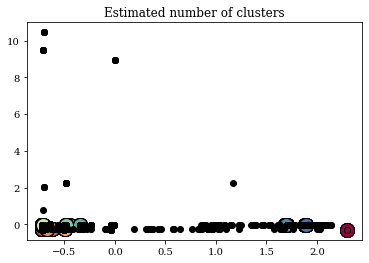

In [ ]:
unique_labels = set(label)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = label == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters")
plt.show()